<a href="https://colab.research.google.com/github/yokoanzai/Projects/blob/main/Python/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import export_text

In [5]:
# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

# Explore the dataset
print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [6]:
# Data preprocessing
# Drop irrelevant columns and handle missing values
titanic_df = titanic_df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
titanic_df = titanic_df.dropna()

In [7]:
# Convert categorical variables to numerical
titanic_df['Sex'] = titanic_df['Sex'].map({'female': 0, 'male': 1})

In [8]:
# Define features and target variable
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.70


In [12]:
# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.72      0.75        87
           1       0.61      0.66      0.63        56

    accuracy                           0.70       143
   macro avg       0.69      0.69      0.69       143
weighted avg       0.70      0.70      0.70       143



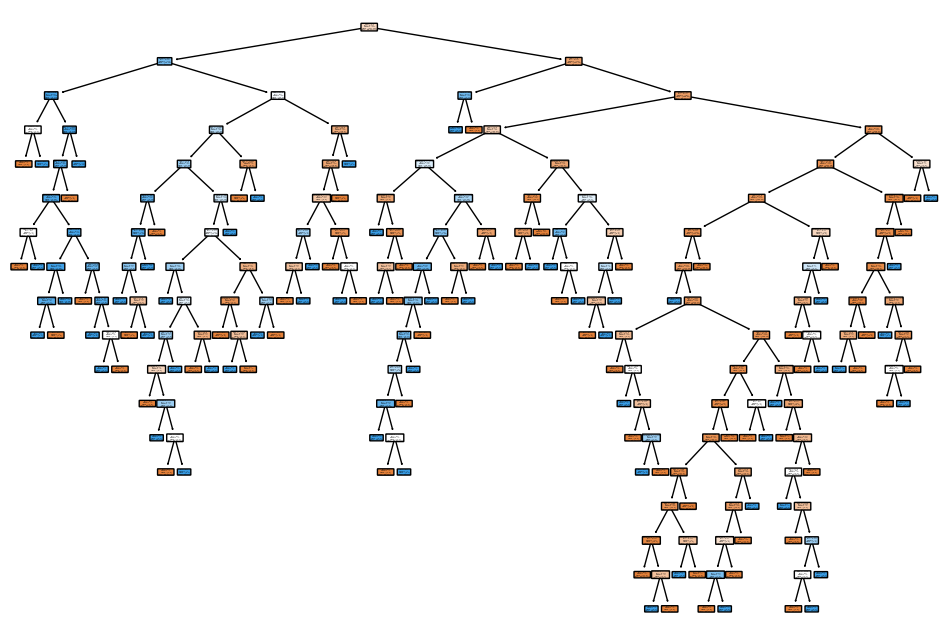

In [13]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
plt.show()

In [14]:
# Display textual representation of the Decision Tree
tree_rules = export_text(clf, feature_names=list(X.columns))
print("Decision Tree Rules:")
print(tree_rules)

Decision Tree Rules:
|--- Sex <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Age <= 2.50
|   |   |   |--- Pclass <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- Pclass >  1.50
|   |   |   |   |--- class: 1
|   |   |--- Age >  2.50
|   |   |   |--- Fare <= 28.86
|   |   |   |   |--- Fare <= 28.23
|   |   |   |   |   |--- PassengerId <= 50.50
|   |   |   |   |   |   |--- Age <= 41.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Age >  41.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- PassengerId >  50.50
|   |   |   |   |   |   |--- Age <= 37.00
|   |   |   |   |   |   |   |--- PassengerId <= 315.00
|   |   |   |   |   |   |   |   |--- PassengerId <= 280.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- PassengerId >  280.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- PassengerId >  315.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   | 